In [37]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [413]:
def manual_call2(spline_coefs, spline_positions, x):
    """
    spline_coefs: shape of (n x 4 x spline_positions)
    
    return value: shape of (n x x)
    
    x : shape of (n x n_points)
    """
    interval = torch.round(spline_positions[1] - spline_positions[0], decimals = 4)
    x = torch.clamp(x, min = spline_positions[0], max = spline_positions[-1]- 0.0005)
    indexes = torch.floor((x - spline_positions[0])/interval).long()
    expanded_index = indexes.unsqueeze(dim=1).expand(-1,4,-1)
    x_1 = x - spline_positions[indexes]
    x_2 = x_1 * x_1
    x_3 = x_2 * x_1
    x_0 = torch.ones_like(x_1)
    x_powers = torch.stack([x_3, x_2, x_1, x_0]).permute(1,0,2)
    value = torch.sum(torch.mul(x_powers, torch.gather(spline_coefs, 2, expanded_index)), axis = 1) 
    
    
    return value

In [407]:
# shifts = torch.arange(-28, 28, 2)
# shifts = shifts.repeat(927, 1)
# z = (shifts.reshape(-1,1) - xaxis).reshape(927,28, -1)

In [414]:
for i in range(40):
    test2 = manual_call2(Splines_03[index:index+batch_size], xaxis, full_xdos + true_alignments.view(-1,1))


In [8]:
with torch.no_grad():
    Splines_03 = torch.load("./Splines_Total_03.pt")
    Splines_01 = torch.load("./Splines_Total_01.pt")

In [12]:
with torch.no_grad():
    total_dos3 = torch.load("./total_ldos3.pt")
    total_dos1 = torch.load("./total_ldos1.pt")

In [51]:
with torch.no_grad():
    lower_bound2 = -24.5537 - 2
    upper_bound2 = 11.3464 + 2
    efermi_max = -4.7117
    truncated_upper_bound = efermi_max + 3
    xaxis = torch.arange(lower_bound2,upper_bound2,0.001)
    full_xdos = torch.arange(-24.5537 - 1.5, 11.3464 + 1.5 - 0.05, 0.05)
    partial_xdos = torch.arange(-24.5537 - 1.5, efermi_max + 3, 0.05)

In [188]:
upper_bound2 - lower_bound2

39.900099999999995

In [418]:
shifts = torch.arange(-28, 28, 2)
shifts = shifts.repeat(927,1)
# shi
shifts = shifts.T

In [457]:
def t_get_mse(a, b, xdos = None, perc = False):
    if xdos is not None:
        if len(a.size()) > 1:
            mse = (torch.trapezoid((a - b)**2, xdos, axis=1)).mean()
        else:
            mse = (torch.trapezoid((a - b)**2, xdos, axis=0)).mean()
        if not perc:
            return mse
        else:
            mean = b.mean(axis = 0)
            std = torch.trapezoid((b - mean)**2, xdos, axis=1).mean()
            return (100 * mse / std)
    else:
        if len(a.size()) > 1:
            mse = ((a - b)**2).mean(dim = (1,2))
        else:
            mse = ((a - b)**2).mean()
        if len(mse.shape) > 1:
            raise ValueError('Loss became 2D')
        if not perc:
            return mse
        else:
            return 100 * mse / b.std(dim=0, unbiased = True)

In [469]:
a = torch.rand(29,927)
b = torch.ones_like(a)


In [489]:
torch.index_select(a, dim =1, index = i)

tensor([[0.0150, 0.3560, 0.1094,  ..., 0.0150, 0.0575, 0.7629],
        [0.7238, 0.9709, 0.3950,  ..., 0.7238, 0.5274, 0.9011],
        [0.1114, 0.9859, 0.8028,  ..., 0.1114, 0.0692, 0.7382],
        ...,
        [0.9630, 0.5954, 0.1033,  ..., 0.9630, 0.2133, 0.3217],
        [0.3105, 0.6311, 0.5671,  ..., 0.3105, 0.5694, 0.3700],
        [0.4975, 0.5055, 0.3629,  ..., 0.4975, 0.8139, 0.0691]])

In [471]:
a

tensor([[0.0150, 0.6438, 0.6472,  ..., 0.0143, 0.3003, 0.9438],
        [0.7238, 0.0859, 0.3940,  ..., 0.6917, 0.3882, 0.7487],
        [0.1114, 0.8945, 0.8884,  ..., 0.0397, 0.8491, 0.7889],
        ...,
        [0.9630, 0.3745, 0.6036,  ..., 0.7591, 0.7048, 0.9748],
        [0.3105, 0.3299, 0.5299,  ..., 0.6879, 0.3857, 0.0191],
        [0.4975, 0.0869, 0.0591,  ..., 0.5842, 0.2988, 0.0298]])

In [479]:
i = torch.argmin(a, dim = 0)

In [517]:
i

tensor([ 0, 15,  7,  0,  8,  2, 10, 15,  7,  3, 12, 26,  3, 18, 15, 21,  3,  4,
         5, 13,  0, 16,  4,  9,  2, 10, 22, 24, 24, 23,  0, 14, 17, 21, 24, 22,
        26,  8, 11, 18, 26,  5,  9, 28,  2, 12, 11,  4, 12, 15, 22,  7, 28, 22,
        21,  8, 26, 20, 12, 10, 22, 14, 15, 21, 18,  9, 23,  6, 24, 26, 24, 23,
        28, 11,  9, 10, 25,  5, 16, 28, 24,  0,  3,  9,  7,  6, 21,  8,  7, 16,
         5,  7, 18, 20, 11, 17, 20,  4, 15, 14,  6, 28,  5, 10, 11,  2, 19, 26,
         3, 13, 27, 17,  2, 24,  2, 12, 10,  4,  2, 27,  0,  4, 24,  2,  6, 16,
        16, 23,  0,  3,  8, 16,  1,  9, 21, 18,  8,  3, 28, 23, 27, 26, 21, 21,
         6,  1,  8, 22, 11,  8, 24,  1, 26,  0, 19, 14,  0, 24, 28, 18,  6,  8,
        26,  7, 11, 28,  5,  5, 20, 13, 12,  9,  3, 27, 12, 19, 12,  1, 25, 20,
        21,  8,  0, 25,  9, 18, 22,  2,  4, 10,  0,  6, 18, 19,  4, 28, 23,  8,
        20, 27,  6, 17, 18, 15,  4,  0,  4, 28, 27, 25, 17, 24, 17, 24, 10, 19,
        16,  8, 11,  7, 18, 15, 21, 12, 

In [573]:
from dostools.loss import loss
def MSE_shift_spline(y_pred, critical_xdos, target_splines, spline_positions, n_epochs):
    shifts = torch.nn.parameter.Parameter(torch.zeros(y_pred.shape[0]))
    opt_LBFGS = torch.optim.LBFGS([shifts], lr = 0.1, line_search_fn = 'strong_wolfe', tolerance_grad = 1e-15, tolerance_change = 1e-15)#, weight_decay = 0)
    opt_adam = torch.optim.Adam([shifts], lr = 1e-1, weight_decay = 0)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_adam, factor = 0.1, patience = 20, threshold = 1e-7, min_lr = 1e-7)
   
    for i in tqdm(range(n_epochs)):
        def closure():
            opt_adam.zero_grad()
            shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + shifts.view(-1,1))
#             shifted_ldos = evaluate_dos_from_fourier(shifted_preds, emin, emax, num_eval=778)
            #loss_i = torch.mean((y_pred - shifted_target)**2)
#             loss_i = loss.t_get_mse(y_pred, shifted_target)
            loss_i = loss.t_get_mse(y_pred, shifted_target)
#             loss_i += loss.t_get_mse(shifted_target[:,cutoff_index], target[:,cutoff_index])
            loss_i.backward(gradient = torch.tensor(1), inputs = shifts)
#             print (loss_i.item(), shifts.grad.item(), shifts.item())
            return (loss_i)

        mse = opt_adam.step(closure)
    shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + shifts.view(-1,1))
    rmse = loss.t_get_rmse(y_pred, shifted_target, critical_xdos, perc = True)
    return rmse, shifts

In [601]:
from dostools.loss import loss
def MSE_shift_spline2(y_pred, critical_xdos, target_splines, spline_positions, n_epochs):
    all_shifts = []
    all_mse = []
    for offset in tqdm(range(-28,29,2)):
        shifts = torch.nn.parameter.Parameter(torch.zeros(y_pred.shape[0]) + offset)
        opt_LBFGS = torch.optim.LBFGS([shifts], lr = 0.1, line_search_fn = 'strong_wolfe', tolerance_grad = 1e-15, tolerance_change = 1e-15)#, weight_decay = 0)
        opt_adam = torch.optim.Adam([shifts], lr = 1e-1, weight_decay = 0)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_adam, factor = 0.1, patience = 20, threshold = 1e-7, min_lr = 1e-7)
        best_error = torch.tensor(100)
        best_shifts = shifts.clone()
        for i in (range(n_epochs)):
            def closure():
                opt_adam.zero_grad()
                shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + shifts.view(-1,1))
    #             shifted_ldos = evaluate_dos_from_fourier(shifted_preds, emin, emax, num_eval=778)
                #loss_i = torch.mean((y_pred - shifted_target)**2)
    #             loss_i = loss.t_get_mse(y_pred, shifted_target)
                loss_i = ((y_pred - shifted_target)**2).mean()
    #             loss_i += loss.t_get_mse(shifted_target[:,cutoff_index], target[:,cutoff_index])
                loss_i.backward(gradient = torch.tensor(1), inputs = shifts)
    #             print (loss_i.item(), shifts.grad.item(), shifts.item())
                return (loss_i)

            mse = opt_adam.step(closure)
            if mse < best_error:
                best_shifts = shifts.clone()
                best_error = mse.clone()
        #Evaluate
        all_shifts.append(best_shifts)
        shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + best_shifts.view(-1,1))
        mse = ((y_pred - shifted_target)**2).mean(dim = 1)
        all_mse.append(mse)
    all_shifts = torch.vstack(all_shifts)
    all_mse = torch.vstack(all_mse)
    min_index = torch.argmin(all_mse, dim = 0)
    optimal_shift = []
    for i in range(len(min_index)):
        optimal_shift.append(all_shifts.T[i, min_index[i]])
    optimal_shift = torch.tensor(optimal_shift)
    shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + optimal_shift.view(-1,1))
    rmse = loss.t_get_rmse(y_pred, shifted_target, critical_xdos, perc = True)
    return rmse, optimal_shift

In [655]:
from dostools.loss import loss
def MSE_shift_spline3(y_pred, critical_xdos, target_splines, spline_positions, n_epochs):
    all_shifts = []
    all_mse = []
    optim_search_mse = []
    offsets = torch.arange(-28,29,2)
    with torch.no_grad():
        for offset in offsets:
            shifts = torch.zeros(y_pred.shape[0]) + offset
            shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + shifts.view(-1,1))
            loss_i = ((y_pred - shifted_target)**2).mean(dim = 1)
            optim_search_mse.append(loss_i)
        optim_search_mse = torch.vstack(optim_search_mse)
        min_index = torch.argmin(optim_search_mse, dim = 0)
        optimal_offset = offsets[min_index]
    
    offsets = [optimal_offset -2, optimal_offset, optimal_offset+2]
    
    for offset in tqdm(offsets):
        shifts = torch.nn.parameter.Parameter(offset.float())
        opt_LBFGS = torch.optim.LBFGS([shifts], lr = 0.1, line_search_fn = 'strong_wolfe', tolerance_grad = 1e-15, tolerance_change = 1e-15)#, weight_decay = 0)
        opt_adam = torch.optim.Adam([shifts], lr = 1e-1, weight_decay = 0)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_adam, factor = 0.1, patience = 20, threshold = 1e-7, min_lr = 1e-7)
        best_error = torch.tensor(100)
        best_shifts = shifts.clone()
        for i in (range(n_epochs)):
            def closure():
                opt_adam.zero_grad()
                shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + shifts.view(-1,1))
    #             shifted_ldos = evaluate_dos_from_fourier(shifted_preds, emin, emax, num_eval=778)
                #loss_i = torch.mean((y_pred - shifted_target)**2)
    #             loss_i = loss.t_get_mse(y_pred, shifted_target)
                loss_i = ((y_pred - shifted_target)**2).mean()
    #             loss_i += loss.t_get_mse(shifted_target[:,cutoff_index], target[:,cutoff_index])
                loss_i.backward(gradient = torch.tensor(1), inputs = shifts)
    #             print (loss_i.item(), shifts.grad.item(), shifts.item())
                return (loss_i)

            mse = opt_adam.step(closure)
            if mse < best_error:
                best_shifts = shifts.clone()
                best_error = mse.clone()
        #Evaluate
        all_shifts.append(best_shifts)
        shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + best_shifts.view(-1,1))
        mse = ((y_pred - shifted_target)**2).mean(dim = 1)
        all_mse.append(mse)
    all_shifts = torch.vstack(all_shifts)
    all_mse = torch.vstack(all_mse)
    min_index = torch.argmin(all_mse, dim = 0)
    optimal_shift = []
    for i in range(len(min_index)):
        optimal_shift.append(all_shifts.T[i, min_index[i]])
    optimal_shift = torch.tensor(optimal_shift)
    shifted_target = manual_call2(target_splines, spline_positions, critical_xdos + optimal_shift.view(-1,1))
    rmse = loss.t_get_rmse(y_pred, shifted_target, critical_xdos, perc = True)
    return rmse, optimal_shift, all_mse, all_shifts

In [596]:
all_error[:,0]

tensor([1.2005e-01, 1.2021e-01, 1.2745e-01, 1.3354e-01, 1.5293e-01, 1.6391e-01,
        1.6316e-01, 1.9940e-01, 2.0002e-01, 2.3553e-01, 2.2701e-01, 1.9945e-01,
        1.9840e-01, 1.4053e-01, 1.4139e-01, 6.9947e-02, 6.2310e-02, 6.2277e-02,
        6.2348e-02, 1.7426e-09, 5.0384e-12, 3.7029e-12, 3.0673e-07, 5.1855e-02,
        5.1784e-02, 5.1678e-02, 9.2785e-02, 9.2767e-02, 9.3232e-02],
       dtype=torch.float64, grad_fn=<SelectBackward0>)

In [595]:
all_shift[:,0]

tensor([-31.0223, -30.3160, -26.0885, -23.4150, -21.0903, -17.5235, -18.0635,
        -14.1413, -14.0753,  -9.4784,  -6.6460,  -3.0280,  -2.9006,   1.8578,
          1.1330,   7.2483,   8.4833,   8.3534,   8.5191,  13.4003,  13.4000,
         13.4000,  13.4038,  18.7440,  18.4713,  18.5822,  25.5288,  25.2945,
         25.7483], grad_fn=<SelectBackward0>)

In [435]:
((b - a) ** 2).mean()

tensor(0.3332)

In [363]:
shifts.shape

torch.Size([927, 28])

In [364]:
50 it/s

In [653]:
batch_size = 927
index = 0
# true_alignments = (torch.rand(batch_size)-0.5) * 2 #torch.tensor([0.9])

true_alignments = torch.rand(927) * 25
shift_target = manual_call2(Splines_03[index:index+batch_size], xaxis, full_xdos + true_alignments.view(-1,1))
error3, align3, all_error, all_shift = MSE_shift_spline3(shift_target, full_xdos, Splines_03[index:index+batch_size], xaxis, 200)
# print (torch.where(abs(true_alignments + align)>1e-3))

torch.Size([29, 927])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.27s/it]


In [656]:
error3

tensor(0.0050, dtype=torch.float64)

In [657]:
align3

tensor([1.5933e+01, 1.7330e+01, 1.5075e+00, 1.8444e+00, 1.0907e+01, 7.0404e+00,
        1.1343e+01, 1.1789e+01, 9.9925e+00, 1.2550e+01, 1.6038e+01, 2.2193e+01,
        7.5066e+00, 8.7309e+00, 1.9006e+01, 2.0920e+01, 8.7882e+00, 2.1498e+01,
        2.3297e+01, 1.3612e+01, 2.1757e+01, 2.0176e+01, 2.3534e+01, 2.2457e+01,
        2.4652e+01, 1.6004e+01, 1.5464e+01, 1.0917e+01, 2.2832e+01, 1.2268e+01,
        1.9812e+01, 1.5851e+01, 1.0728e+01, 1.0520e+01, 1.6518e+01, 1.0202e+01,
        1.7134e+01, 9.0370e+00, 1.1482e+01, 3.0695e+00, 1.5811e+01, 3.5424e+00,
        1.9116e+00, 9.1722e+00, 9.5080e+00, 3.9184e+00, 6.0645e+00, 1.6063e+01,
        7.0081e-01, 5.5396e+00, 2.6170e+00, 1.7798e+01, 4.0194e+00, 9.4981e+00,
        2.4768e+01, 6.6582e+00, 1.7304e+00, 1.9956e+01, 5.2931e+00, 1.5498e+01,
        7.7458e+00, 9.8072e+00, 1.7827e+01, 2.1037e+00, 9.9552e+00, 1.4974e+01,
        1.3286e+01, 1.9595e+01, 7.5784e+00, 7.3870e+00, 1.0800e+01, 5.4675e-01,
        9.9521e+00, 2.1426e+01, 7.5426e+

In [646]:
true_alignments

tensor([ 8.3358,  2.8370, 11.6037,  0.9611,  8.2463,  3.5191,  0.8531, 22.3584,
         8.7174,  8.1162, 13.0347, 22.9954,  8.6602,  7.8749, 22.8256, 21.5666,
         2.1668,  5.9923,  6.3001,  2.1777, 23.3380, 12.9699,  2.9323, 21.2345,
        16.5034,  9.0373, 17.2543, 24.0596,  6.5519, 20.2897,  0.2674, 13.8998,
        18.9008, 24.7216,  4.1683, 24.7901, 10.6703,  0.8583, 23.2561, 16.5145,
        20.8584,  5.7090,  7.3425, 21.5657, 17.7926, 11.0394, 19.2834, 18.7318,
        15.1959,  6.6456, 16.3837,  8.4254,  4.7387, 10.8619, 17.5160, 21.2148,
         6.1442, 16.6624, 24.1324, 13.2043, 24.8722,  2.7572,  4.7098,  0.0289,
         6.3787, 17.2753, 14.5071,  5.6426,  6.8512, 24.3548, 16.3239,  5.4038,
         5.4297, 15.8818, 11.5553, 16.9927, 14.8826, 16.2574, 19.4249, 20.3294,
        23.8971,  9.1948,  7.2583,  3.9841,  1.3482, 20.2143, 20.8540, 19.9020,
        12.2178, 12.8239, 14.2294, 20.9119, 22.7297,  2.3291, 18.9186, 22.1818,
         6.6643,  4.0457,  1.2567,  8.01

In [638]:
error3

tensor(104.0282, dtype=torch.float64)

In [637]:
true_alignments - align3

tensor([ 1.8302e+00,  1.2760e+01,  0.0000e+00, -2.6703e-05, -9.9945e-04,
        -4.6103e+00, -1.9073e-06,  1.1774e+01,  2.9755e-04,  3.9506e+00,
        -4.7580e+00,  4.9792e+00,  3.6883e+00,  5.0129e+00,  4.8019e+00,
         9.5367e-07, -2.8610e-06,  2.1572e-03,  1.1941e+01, -1.4305e-05,
         3.3379e-05, -5.4545e+00, -4.7798e+00, -1.4305e-05, -5.3290e+00,
        -5.3131e+00,  3.9624e+00,  1.3351e-05,  5.3908e+00, -6.5291e+00,
         8.5831e-06, -2.0981e-05,  3.7146e+00,  3.1471e-05,  6.5838e+00,
         1.2981e+01,  6.9141e-05,  1.1483e+01, -9.3794e-04,  4.4414e+00,
         3.7193e-05, -8.5831e-06, -7.2479e-05, -1.9264e-04, -3.9950e+00,
        -1.5545e-04, -5.5486e+00,  1.3680e+01,  1.4510e+01,  1.2980e+01,
         5.0307e+00,  1.3669e+01, -1.7166e-05,  9.0917e+00,  1.7227e-01,
         5.7220e-06, -4.9567e+00, -4.8416e+00,  5.6926e+00, -2.2888e-05,
        -4.7650e+00, -4.5856e+00,  5.2452e-05, -1.7341e-01, -4.9195e+00,
         8.4415e+00,  3.1471e-05,  1.3538e+01,  3.3

In [630]:
error3

tensor(0.0203, dtype=torch.float64)

In [633]:
all_shift

tensor([[3.7668, 1.6655, 6.1400,  ..., 7.3949, 0.5670, 7.1344],
        [8.8335, 1.6656, 6.1258,  ..., 7.3946, 0.5660, 7.1325],
        [8.7193, 5.9886, 6.1273,  ..., 7.3947, 0.4832, 7.1324]],
       grad_fn=<CatBackward0>)

In [617]:
error3


tensor(0.0312, dtype=torch.float64)

In [634]:
align3

tensor([8.7193e+00, 1.6655e+00, 6.1258e+00, 2.4929e+00, 9.3330e+00, 6.1740e+00,
        7.3032e+00, 9.9711e+00, 3.2320e+00, 8.9468e+00, 1.7788e+00, 4.1607e+00,
        2.0572e-01, 4.9110e+00, 7.6432e+00, 4.6490e+00, 9.0626e+00, 5.5950e+00,
        5.4933e+00, 8.6658e-01, 2.0665e+00, 2.8892e+00, 8.2957e-01, 7.7392e+00,
        3.9286e+00, 2.8025e+00, 8.8784e+00, 4.7478e+00, 1.4920e+00, 2.7881e+00,
        1.5895e+00, 2.1625e+00, 9.9283e+00, 3.3374e+00, 4.9381e+00, 2.0428e+00,
        4.0888e+00, 9.4326e+00, 5.0194e+00, 3.2465e+00, 8.8400e+00, 4.8848e+00,
        3.4332e+00, 4.4493e+00, 7.0091e+00, 8.1648e+00, 6.6045e+00, 6.9979e-01,
        9.1608e-01, 4.7482e+00, 6.5577e+00, 2.7857e+00, 7.0007e+00, 3.2183e+00,
        1.6087e+00, 1.3207e-01, 4.8770e+00, 4.0846e-01, 4.4245e+00, 6.1257e+00,
        2.9108e+00, 2.8876e+00, 3.1927e+00, 6.4579e+00, 5.6150e+00, 8.3677e+00,
        9.7999e+00, 1.0300e-01, 6.2094e+00, 3.1723e+00, 3.9058e+00, 8.9710e+00,
        8.1042e+00, 4.0130e+00, 1.7060e+

In [611]:
batch_size = 927
index = 0
# true_alignments = (torch.rand(batch_size)-0.5) * 2 #torch.tensor([0.9])

true_alignments = torch.zeros(927) + -18
shift_target = manual_call2(Splines_03[index:index+batch_size], xaxis, full_xdos + true_alignments.view(-1,1))
error2, align2= MSE_shift_spline2(shift_target, full_xdos, Splines_03[index:index+batch_size], xaxis, 200)
# print (torch.where(abs(true_alignments + align)>1e-3))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [01:29<00:00,  3.08s/it]


In [598]:
batch_size = 927
index = 0
# true_alignments = (torch.rand(batch_size)-0.5) * 2 #torch.tensor([0.9])

true_alignments = torch.zeros(927) - 18
shift_target = manual_call2(Splines_03[index:index+batch_size], xaxis, full_xdos + true_alignments.view(-1,1))
error, align = MSE_shift_spline(shift_target, full_xdos, Splines_03[index:index+batch_size], xaxis, 200)
# print (torch.where(abs(true_alignments + align)>1e-3))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 59.10it/s]


In [555]:
all_error

tensor([[7.1399e-02, 7.4184e-02, 6.8932e-02,  ..., 3.5890e-02, 3.7558e-02,
         3.8023e-02],
        [7.9101e-04, 8.5785e-04, 7.8415e-04,  ..., 4.8367e-04, 5.7928e-04,
         5.5207e-04],
        [7.2882e-13, 1.8936e-10, 5.6565e-10,  ..., 3.1729e-13, 5.8616e-10,
         8.5755e-10]], dtype=torch.float64, grad_fn=<CatBackward0>)

In [554]:
all_shift

tensor([[-1.7137, -1.7958, -1.7517,  ..., -0.7075, -0.8969, -0.8985],
        [ 1.8245,  1.8240,  1.8192,  ...,  1.8191,  1.7872,  1.7977],
        [ 2.0010,  2.0010,  2.0009,  ...,  2.0010,  2.0011,  2.0009]],
       grad_fn=<CatBackward0>)

In [599]:
error

tensor(296.4560, dtype=torch.float64, grad_fn=<DivBackward0>)

In [600]:
error2

tensor(0., dtype=torch.float64)

In [590]:
align


Parameter containing:
tensor([ 1.1330e+00,  3.0543e+00,  1.6851e+00,  1.8005e+00,  1.2071e+00,
         1.5688e+00,  1.8161e+00,  8.3290e-01,  2.0946e+00,  1.5397e+00,
         1.4863e+00,  2.3696e+00,  2.7048e+00,  1.2749e+00,  1.4842e+00,
         1.5260e+00,  3.1515e+00,  1.9976e+00,  1.1451e+00,  2.3791e-01,
         3.2647e+00,  8.6244e-01,  1.5726e+00,  1.1577e+00,  1.7780e+00,
         3.4599e+00,  4.2537e-01,  7.2440e-01,  1.0756e+00,  1.4001e+00,
         2.7377e-01,  1.4343e+00,  1.0912e+00,  5.2172e-01,  1.5325e+00,
         2.6795e+00,  1.3907e+00,  8.6075e-01,  9.8878e-01,  6.2063e-01,
         9.9265e-01,  7.1759e-01,  2.2401e+00,  1.2097e-02,  3.9044e+00,
         6.5665e+00,  9.6827e-01,  3.8972e+00,  7.9526e-01,  8.8241e-01,
         9.9929e-01,  2.0812e-01,  2.1118e+00,  2.6175e+00,  3.5303e-01,
         1.4843e-01,  3.6772e+00,  2.1822e-01,  3.5058e+00,  1.9896e+00,
         7.9380e-01,  1.5162e+00,  2.7478e+00,  3.3076e+00,  5.5170e+00,
         6.1567e+00,  5.1682e

In [591]:
align2

tensor([13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000, 13.4000,
        13.4000, 13.4000, 13.4000, 13.40

In [372]:
with torch.no_grad():
    aligned_target = manual_call2(Splines_03[index:index+batch_size], xaxis, full_xdos + true_alignments.view(-1,1) - align.view(-1,1))

torch.Size([927, 4, 778])


In [301]:
10/0.05

200.0

In [373]:
print (error)

tensor(0.0199, dtype=torch.float64, grad_fn=<DivBackward0>)


In [374]:
print (error)

tensor(0.0199, dtype=torch.float64, grad_fn=<DivBackward0>)


In [ ]:
align

In [304]:
print (error)

tensor(38.7871, dtype=torch.float64, grad_fn=<DivBackward0>)


In [287]:
value, worst_index = torch.max(abs(align - true_alignments),0)
print (value)
print (worst_index)

tensor(24.7067, grad_fn=<MaxBackward0>)
tensor(340)


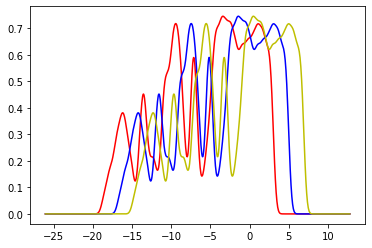

In [241]:
a_index = worst_index
plt.plot(full_xdos, shift_target[a_index] , c='r')
plt.plot(full_xdos, total_dos3[a_index], c= 'b')
plt.plot(full_xdos, aligned_target[a_index], c= 'y')

In [305]:
align

Parameter containing:
tensor([-2.9987, -2.9888, -2.9953,  1.2157, -2.9989, -2.9097, -3.0061, -2.9993,
        -2.9993, -2.9925, -2.9986, -2.9984, -3.0000, -3.0004, -3.0009,  2.8594,
        -2.9998, -2.9991, -2.9989, -2.9971, -2.9984, -2.9987, -2.9994, -2.9986,
        -2.9989, -2.9992, -2.9984, -2.9983, -2.9981, -2.9987, -2.9992, -2.9984,
        -2.9990,  1.2451, -2.9991, -2.9988, -2.9988, -3.0000, -2.9991, -2.9987,
        -2.9988, -3.0000, -2.9988, -2.9993, -3.0004, -2.9985, -2.9985, -2.9987,
        -2.9984, -2.9986, -2.9987, -2.9992, -2.9992, -2.9992, -2.9998, -3.0013,
        -2.9984, -2.9984, -2.9998, -2.9998, -2.9997, -2.9987, -2.9971, -2.9998,
        -2.9988, -2.9983, -2.9999, -2.9991, -2.9999, -2.9999, -2.9986, -2.9986,
        -2.9987, -2.9996, -2.9986, -2.9980, -2.9993, -2.9991, -3.0002, -2.9990,
        -2.9992, -2.9987, -2.9903, -2.9988, -2.9992, -2.9988, -2.9988, -2.9997,
        -2.9986, -2.9987, -2.9988, -2.9988, -2.9996, -2.9997, -2.9990, -2.9992,
        -3.0000, -

In [327]:
align

Parameter containing:
tensor([-1.9899, -1.9899, -1.9901, -1.9899, -1.9899, -1.9899, -1.9898, -1.9900,
        -1.9900, -1.9899, -1.9901, -1.9901, -1.9897, -1.9900, -1.9899, -1.9901,
        -1.9899, -1.9900, -1.9901, -1.9900, -1.9900, -1.9899, -1.9897, -1.9899,
        -1.9902, -1.9901, -1.9902, -1.9901, -1.9899, -1.9899, -1.9899, -1.9903,
        -1.9899, -1.9899, -1.9899, -1.9900, -1.9902, -1.9901, -1.9901, -1.9900,
        -1.9904, -1.9897, -1.9900, -1.9900, -1.9900, -1.9901, -1.9898, -1.9900,
        -1.9899, -1.9903, -1.9900, -1.9899, -1.9899, -1.9899, -1.9899, -1.9898,
        -1.9898, -1.9899, -1.9899, -1.9900, -1.9901, -1.9900, -1.9900, -1.9901,
        -1.9899, -1.9899, -1.9900, -1.9904, -1.9901, -1.9899, -1.9899, -1.9900,
        -1.9900, -1.9902, -1.9899, -1.9899, -1.9900, -1.9901, -1.9900, -1.9899,
        -1.9899, -1.9900, -1.9901, -1.9899, -1.9901, -1.9901, -1.9900, -1.9900,
        -1.9900, -1.9900, -1.9900, -1.9900, -1.9901, -1.9899, -1.9903, -1.9901,
        -1.9901, -